In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import  matplotlib.pyplot  as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers


In [8]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Train : ' ,"x = ",x_train.shape ,"y = ", y_train.shape)
print("Test : ","x= ", x_test.shape ,"y = ",y_test.shape)

Train :  x =  (60000, 28, 28) y =  (60000,)
Test :  x=  (10000, 28, 28) y =  (10000,)


In [9]:
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.


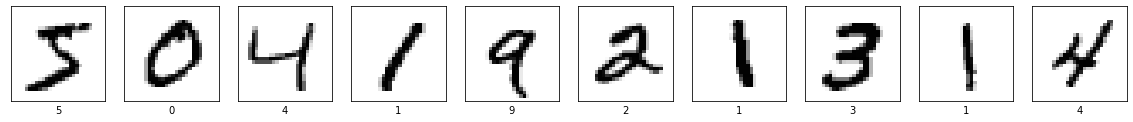

In [11]:
plt.figure(figsize =(20,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i],cmap ='binary')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])

In [12]:
#reshape our dataset
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [13]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape =(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 59s 31ms/step - loss: 0.1561 - accuracy: 0.9516 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0491 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0398 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0329 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0300 - val_accura

In [19]:
#saving the model
model.save('my_model_digits.h5')
print("saved model to disk")

saved model to disk


In [22]:
from tensorflow.keras.models import load_model
model = load_model('my_model_digits.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def predict_sample():
	# load the image
	img = load_image('sample2.jpg')
	# load model
	model = load_model('my_model_digits.h5')
	# predict the class
	digit = model.predict_classes(img)
	print(digit[0])
predict_sample()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 3s - loss: 0.0387 - accuracy: 0.9888 - 3s/epoch - 9ms/step
0.9887999892234802


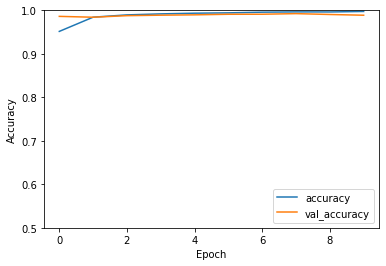

In [28]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)
